# VCG SP22: Numpy and Pandas Workshop // Intro to Data Science

Created by Rithvik Sunku
***
We will be using ***Jupyter Notebook***, a commonly used Python executable environemnt, to teach you the following:

- Data Cleaning/Preparation
- Exploratory Data Analysis
- Data Visualization
- Web Mining/Data Scraping
- Neural Networks

*documentation for [numpy](https://numpy.org/doc/), [pandas](https://pandas.pydata.org/docs/), and [seaborn](https://seaborn.pydata.org/introduction.html) is listed here*

To get started, load in `pandas`, `numpy`, `seaborn`, and `IPython`:

In [2]:
import pandas as pd #table manipulations library
import numpy as np #math, linear alg, and arrays library
import seaborn as sns #plotting library
import matplotlib.pyplot as plt #assists seaborn with visualizations
import requests #webscraping library
from bs4 import BeautifulSoup #webscraping library
%matplotlib inline
from IPython.display import Image #for importing images (not relevant)

## Intro to Data Manipulation, Visualization, and Analysis

For any consulting related task that requires data science, follow this commonly used diagram to answer problem at hand:

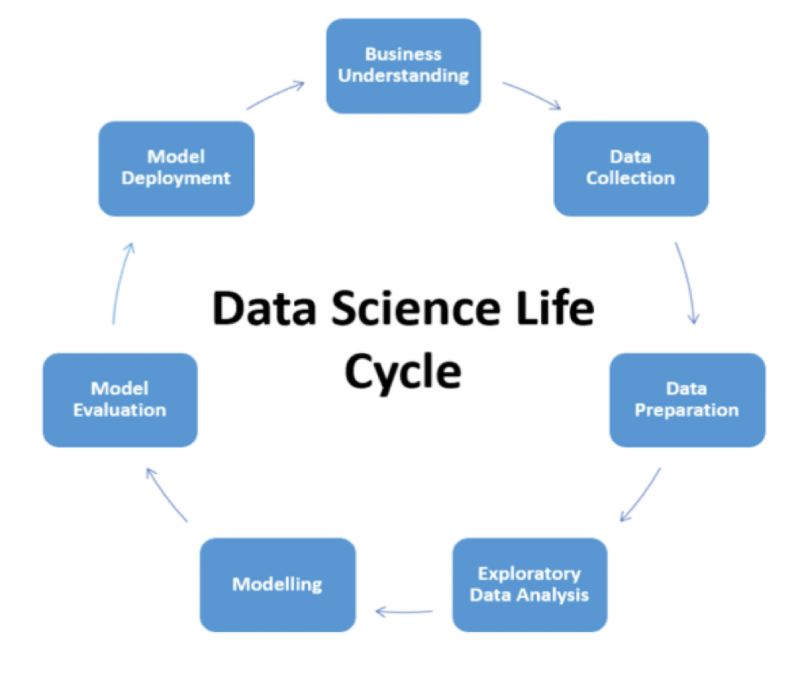

In [3]:
Image(filename='DSLifeCycle.png', width=400)

We will use the following [dataset](https://www.kaggle.com/nicklauskim/nba-per-game-stats-201920?select=nba_2020_shooting.csv) which is player data for the 2019-2020 NBA season:

In [4]:
#read in a csv, a common format of data, into a pandas data frame (also known as a table)
nba = pd.read_csv('nba_2020_advanced.csv')

#this line will display the first 5 rows of the data by defaukt or as many as you want (specify in the parentheses)
nba.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Steven Adams,C,26,OKC,63,1680,20.5,0.604,0.006,0.421,...,14.2,17.3,3.8,2.7,6.5,0.185,1.9,1.1,2.9,2.1
1,Bam Adebayo,PF,22,MIA,72,2417,20.3,0.598,0.018,0.484,...,17.6,21.2,4.6,3.9,8.5,0.168,1.4,2.0,3.4,3.3
2,LaMarcus Aldridge,C,34,SAS,53,1754,19.7,0.571,0.198,0.241,...,7.8,23.4,3.0,1.4,4.5,0.122,1.8,-0.5,1.4,1.5
3,Kyle Alexander,PF,23,MIA,2,13,4.7,0.500,0.000,0.000,...,33.3,10.2,0.0,0.0,0.0,-0.003,-6.1,-3.5,-9.6,0.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,591,8.9,0.473,0.500,0.139,...,16.1,23.3,-0.7,0.4,-0.2,-0.020,-3.2,-1.4,-4.6,-0.4


### Data Cleaning/Preparation
***
To see if there any null values we will access one column and see if any values are null using numpy and pandas

If you want to access a column, you can access it using the `tbl['column name here']` command and converting it to an easier to look at format can be done using `.to_numpy()` which will get it in an array so we can use numpy commands!

In [5]:
nba_positions = nba['Pos'].to_numpy()
nba_positions

array(['C', 'PF', 'C', 'PF', 'SG', 'SG', 'C', 'SG', 'PF', 'SF', 'PF', 'C',
       'PF', 'PF', 'SF', 'PF', 'SF', 'PG', 'SF', 'SF', 'SF', 'PG', 'C',
       'SG', 'PF', 'PG', 'C', 'PG', 'PF', 'SG', 'SF', 'SF', 'SF', 'SF',
       'SF', 'C', 'SF-SG', 'SF', 'SG', 'PF', 'SG', 'SG', 'SG', 'SG', 'SG',
       'C-PF', 'C', 'PF', 'SG', 'SF', 'SF', 'SF', 'PF', 'PG', 'C', 'C',
       'C', 'PF', 'PG', 'SG', 'SF', 'SF', 'PF', 'PF', 'PF', 'C', 'PG',
       'SF', 'SG', 'PF', 'SG', 'PG', 'SG', 'C', 'PF', 'SF', 'SG', 'SF',
       'SF', 'SF', 'SG', 'PG', 'SG', 'SG', 'SG', 'SF', 'C', 'SF', 'SG',
       'PG', 'C', 'SG', 'PG', 'PG', 'PG', 'SG', 'SG', 'SG', 'SG', 'SF',
       'C', 'C', 'C', 'C', 'SG', 'SF', 'C', 'SF-PF', 'SF', 'PF', 'PG',
       'SF', 'C', 'SG', 'PG', 'C', 'C', 'C', 'C', 'SF', 'PG', 'SF', 'PG',
       'PG', 'PG', 'PF', 'PF', 'PF', 'PF', 'PF', 'SG', 'SG', 'SG', 'PF',
       'SG', 'SG', 'SG', 'PF', 'PF', 'PG', 'SG', 'PG', 'PF', 'PF', 'PF',
       'PF-C', 'PF', 'C', 'SG', 'SG', 'SG', 'SF', 'SG', 

Now, we can see if there are any null values, although you can just verify by looking if it is a small dataset like this. To do so, we want to see if any values in our array are equal to `np.nan`. The any allow us to see if any values are actually == np.nan:

In [6]:
any(nba_positions == np.nan)

False

Looks like we're good! Let's also verify that all positions are there. To do so we can use the `.unique()` command in numpy.

In [7]:
nba_positions_unique = np.unique(nba_positions)
nba_positions_unique

array(['C', 'C-PF', 'PF', 'PF-C', 'PG', 'SF', 'SF-PF', 'SF-SG', 'SG'],
      dtype=object)

To access a specific value from this array we can index into them using `array[start, stop (optional), increment(optional)]`:



In [8]:
nba_positions_unique[0]

'C'

Let's also verify that there is one row for each player as this could interfere with things in the future. We can do this using the pandas command `.value_counts()` alongisde indexing into the Player column:



In [9]:
nba['Player'].value_counts()

Jordan McRae                4
Anthony Tolliver            4
John Henson                 3
Michael Kidd-Gilchrist      3
Jabari Parker               3
                           ..
Kentavious Caldwell-Pope    1
Tyson Chandler              1
Terance Mann                1
Brad Wanamaker              1
Nikola Jokić                1
Name: Player, Length: 529, dtype: int64

`Exercise`: Looks like there are multiple counts for some players. Why do you think this is?

**insert answer here**

For the purposes of this demo, let's just keep the first row of the duplicate names and drop the duplicates. To do so we will use the `tbl.drop_duplicates([COLUMN(S)], keep='FIRST OR LAST` commmand.

In [10]:
nba = nba.drop_duplicates(['Player'], keep='first')
nba.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Steven Adams,C,26,OKC,63,1680,20.5,0.604,0.006,0.421,...,14.2,17.3,3.8,2.7,6.5,0.185,1.9,1.1,2.9,2.1
1,Bam Adebayo,PF,22,MIA,72,2417,20.3,0.598,0.018,0.484,...,17.6,21.2,4.6,3.9,8.5,0.168,1.4,2.0,3.4,3.3
2,LaMarcus Aldridge,C,34,SAS,53,1754,19.7,0.571,0.198,0.241,...,7.8,23.4,3.0,1.4,4.5,0.122,1.8,-0.5,1.4,1.5
3,Kyle Alexander,PF,23,MIA,2,13,4.7,0.500,0.000,0.000,...,33.3,10.2,0.0,0.0,0.0,-0.003,-6.1,-3.5,-9.6,0.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,591,8.9,0.473,0.500,0.139,...,16.1,23.3,-0.7,0.4,-0.2,-0.020,-3.2,-1.4,-4.6,-0.4


Other data cleaning in cludes filter the data for certain characteristics. For this purposes of this demo, we will only be working with the `Player, Pos, Age, and 3PAr` columns.

`Exercise`: Using this [documentation](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html), see if you can figure out how to select our columns of interest in the right order.

In [11]:
#nba = ### INSERT YOUR ANSWER HERE ###
#nba.head()

In [12]:
#unccomment and runn this cell to see if you got it right
#print('CORRECT OUTPUT:', all(nba.columns == ['Player', 'Pos', 'Age', '3PAr']))

### Exploratory Data Analysis/Data Visualization
***
Let's try to see if there are any trends with the columns we grabbed from above:

`tbl.describe()` gives us some summary statistics about the data by column. The percentages are percentile values and the rest should be self explanatory.

In [13]:
nba.describe()

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,529.000000,529.000000,529.000000,529.000000,527.000000,527.000000,527.000000,529.000000,529.000000,529.000000,...,527.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,25.561437,42.330813,967.965974,13.006994,0.539913,0.381846,0.254554,4.982420,15.393762,10.184877,...,13.027135,18.546503,1.057845,0.979017,2.036862,0.076707,-1.397921,-0.196975,-1.596975,0.484877
std,4.119487,22.633322,724.965226,6.137886,0.096174,0.207077,0.162047,5.206156,7.348555,5.377679,...,6.135247,5.712764,1.588721,0.930967,2.305318,0.089428,3.366718,1.910584,4.214463,1.071284
min,19.000000,1.000000,1.000000,-13.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.700000,-0.100000,-1.300000,-0.502000,-15.700000,-22.100000,-25.700000,-1.700000
25%,22.000000,22.000000,281.000000,9.500000,0.504500,0.259500,0.157000,2.100000,10.700000,6.500000,...,10.050000,14.800000,0.000000,0.200000,0.200000,0.043000,-3.100000,-1.100000,-3.300000,-0.100000
50%,25.000000,48.000000,922.000000,12.700000,0.551000,0.397000,0.228000,3.400000,14.200000,9.100000,...,12.500000,17.600000,0.500000,0.700000,1.300000,0.084000,-1.200000,-0.300000,-1.300000,0.100000
75%,28.000000,62.000000,1594.000000,16.400000,0.590500,0.515000,0.329000,6.600000,19.100000,12.600000,...,15.100000,21.700000,1.800000,1.500000,3.400000,0.122000,0.500000,0.800000,0.700000,0.800000
max,43.000000,74.000000,2556.000000,33.200000,0.902000,1.000000,1.500000,80.900000,74.700000,53.900000,...,71.400000,43.200000,10.900000,5.000000,13.100000,0.492000,12.400000,11.300000,15.000000,7.300000


Let's also look at the data types to see if they are text or numbers:

In [14]:
nba.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
MP          int64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
dtype: object

Floats are decimal numbers but in most cases you can just treat it as any other numerical value! Objects usually mean the value is a string (text).

This is helpful but let's take a look at if relationship of the Age and 3pt Attempt Rate Columns. To do so we will plot them on a line plot and take a look at their distributions as well.

We will use `seaborn` and `matplotlib` for both of these plots. These are the most common ones and you will definitely use these if needed in a project. To do so you can plug in any of the numerical data into this line of code below:

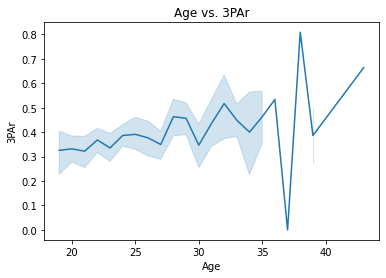

In [15]:
#LINE PLOT - Good for detecting correlation of columns
sns.lineplot(data=nba, x="Age", y="3PAr")
#These allow you to add a title to the visualization which is always important!
plt.plot()
plt.title('Age vs. 3PAr')
plt.show()

Repeated observations are aggregated even when semantic grouping is used which is why you get the hue around the line.

`Exercise`: Why do you think there is no hue and and change in the trend after 34-ish? What might you take away from this graph given the trend?

**insert answer here**

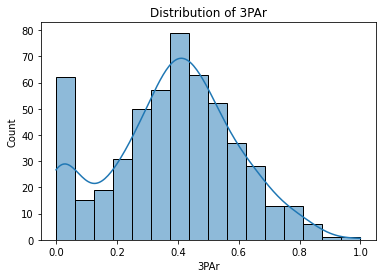

In [16]:
#HISTOGRAM - good for detecting spread of data, kde allows us to see the approximate shape with a smooth curve (Kernal Density Estimate)
sns.histplot(data=nba,x='3PAr', kde=True)
plt.title('Distribution of 3PAr')
plt.show()

Looks like it is a relatively smooth curve centered around 0.4 which seems accurate given the current play style of NBA players.

`Exercise`: Create a histogram to see the distribution of Ages

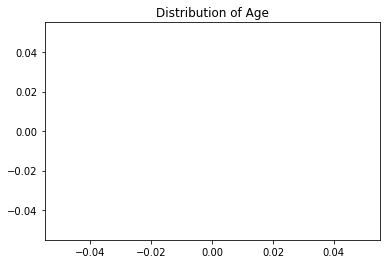

In [17]:
### INSERT YOUR CODE HERE

plt.plot()
plt.title('Distribution of Age')
plt.show()

We also might want to compare by position say 3PAr for Centers vs Point Guards. To do so, we can filter the data using `tbl = tbl[tbl[COLUMN NAME] == CERTAIN VALUE]`. Lets create a data frame for just centers and just point guards and plot histograms for each one. We can also use `.sort_values()` to see who are the top 3point attempt players by these positions.

In [18]:
pg = nba[nba['Pos'] == 'PG'].sort_values(by=['3PAr'], ascending=False)
center = nba[nba['Pos'] == 'C'].sort_values(by=['3PAr'], ascending=False)
display(pg.head(), center.head())

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
350,Brandon Knight,PG,28,TOT,25,462,8.5,0.503,0.784,0.204,...,17.3,20.6,-0.2,0.1,-0.1,-0.010,-1.8,-2.6,-4.4,-0.3
597,Gabe Vincent,PG,23,MIA,9,83,1.2,0.297,0.730,0.000,...,2.6,20.2,-0.3,0.1,-0.2,-0.117,-8.5,-1.9,-10.4,-0.2
422,Patty Mills,PG,31,SAS,66,1485,14.8,0.592,0.674,0.187,...,7.7,20.4,2.3,0.5,2.8,0.091,1.2,-1.2,0.0,0.8
17,Ryan Arcidiacono,PG,25,CHI,58,930,9.0,0.551,0.627,0.173,...,13.5,12.5,0.7,0.7,1.4,0.071,-2.7,-0.1,-2.8,-0.2
611,Derrick Walton,PG,24,TOT,26,248,8.7,0.617,0.615,0.231,...,10.4,8.1,0.4,0.2,0.6,0.111,-2.2,1.3,-1.0,0.1


,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
446,Mike Muscala,C,28,OKC,47,572,12.5,0.569,0.757,0.116,...,7.9,16.6,0.7,0.6,1.3,0.107,0.1,-0.2,-0.1,0.3
11,Ryan Anderson,C,31,HOU,2,14,9.4,0.357,0.714,0.000,...,12.5,23.7,0.0,0.0,0.0,-0.037,-3.3,0.5,-2.8,0.0
415,Nicolò Melli,C,29,NOP,60,1042,11.4,0.556,0.638,0.226,...,11.5,15.7,0.9,0.9,1.8,0.082,-1.5,0.2,-1.3,0.2
340,Mfiondu Kabengele,C,22,LAC,12,64,18.2,0.614,0.625,0.156,...,5.5,23.7,0.1,0.1,0.2,0.173,2.3,-0.1,2.2,0.1
349,Maxi Kleber,C,28,DAL,74,1890,13.6,0.605,0.621,0.181,...,9.5,13.9,3.2,1.7,4.8,0.123,0.4,0.0,0.4,1.1


You can overlay plots as well if they have the same axes:

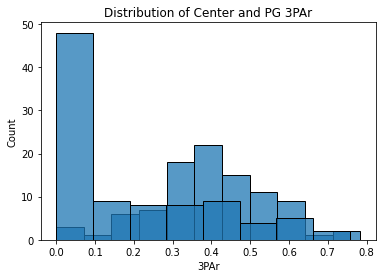

In [19]:
sns.histplot(data=pg,x='3PAr')
sns.histplot(data=center,x='3PAr')

plt.title('Distribution of Center and PG 3PAr')
plt.show()

Alternatively, you can plot them directly and seaborn will make a distribution for each type of position. Most times, this is a better approach because better formatting is done by seaborn and it will just look prettier and take less time to make!

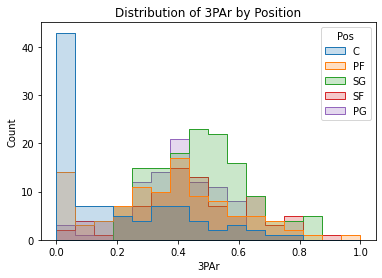

In [20]:
#getting rid of those who play multiple positions
positions = ['C','PG','SG','SF','PF']
good_rows = nba.Pos.isin(positions)
nba = nba[good_rows]

#plotting results
sns.histplot(data=nba, x="3PAr", hue="Pos",element="step")
plt.title('Distribution of 3PAr by Position')
plt.show()

## Web Mining / Data Scraping

Web mining is the process of using data mining techniques and algorithms to extract information directly from the Web by extracting it from Web documents and services, Web content, hyperlinks and server logs. The goal of Web mining is to look for patterns in Web data by collecting and analyzing information in order to gain insight into trends, the industry and users in general.

Web Mining is often used for Natural Language Processing (NLP) techniques and data collection.

We will be using beautiful soup which is a common scraper. Another complex option is selenium which you can scrape and crawl websites. The main steps in web mining are as follow:
1. Request the content (source code) of a specific URL from the server
2. Download the content that is returned
3. Identify the elements of the page that are part of the table we want
4. Extract and (if necessary) reformat those elements into a dataset we can analyze or use in whatever way we require.

***Always keeping in mind website formats can change and certain parts of your scraper will often fail. Using try-catch for example is super common and having paralell scrapers in case one fails are examples of ways to make sure you have contingenies in place. Also keep in mind many websites like Linkedin look for automated scrapers/crawlers and can ban your IP if you are not careful (had to use tor in the past for some websites, super sus don't recommend it).***

A lot of websites are starting to create APIs to seamlessly access data for such purposes. Here's a link to [Reddits](https://praw.readthedocs.io/en/stable/)!

***
`Exercise`: :et's see all the cool positions Mihir Weling has held! Once you feel comfortable. see what other pieces of information you can find using the [documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [45]:
URL = "https://mihirweling.com/"
r = requests.get(URL)

positions = [] #list to store
companies = []
soup = BeautifulSoup(r.content, 'html5lib')
experiences = soup.find_all("div", class_="text pl-3")
for role in experiences:
    positions.append(role.find("span",class_='position').text)
    companies.append(role.find("h2").text)

df = pd.DataFrame({'Companies':companies,"positions": positions})
df

/Users/rithviksunku/anaconda3/lib/python3.7/site-packages/cryptography/hazmat/backends/openssl/x509.py:18: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,


,Companies,positions
0,B.A. Computer Science,"University of California, Berkeley"
1,Amazon,Software Development Engineer Intern
2,DeWaste,Software Engineer Intern
3,Airbnb,Technical Consult
4,Picovoice,Software Engineer Intern
5,Loadstar Sensors,Software Engineer Intern
6,EECS Department,Academic Intern
7,Heylo,Strategy Consultant
8,Valley Consulting Group,"Project Leader, Account and Technical Developm..."


## Neural Networks

Linear regression is a simple but powerful model: to predict a value $y$ from a vector of features $x = (x_1, \ldots, x_k)$, linear regression uses the following:

$$
y = Wx + b
$$

The only way to model complex, nonlinear interactions using linear regression is to define more complex features. But what if we could add another layer of linear regression that computes features for us?

$$
y = W_2(\overbrace{W_1 x + b_1}^\text{features}) + b_2
$$

Unfortunately, this doesn't work because it reduces to a single layer of linear regression. We can simplify this to $y = \big(W_2W_1\big)x + \big(W_2b_1 + b_2\big)$, which is just linear regression written in an unnecessarily complicated way. In order to prevent the simplification to plain old linear regression, we can add a nonlinearity:

$$
y = W_2 f(W_1 x + b_1) + b_2
$$

Here, the nonlinear function $f$ can be anything from a sigmoid to the simple ReLU (restricted linear unit) function, $f(z) = \max(0, z)$. To make our notation a little simpler, we'll use $\theta$ to denote all our parameters: $\theta = (W_1, W_2, b_1, b_2)$

In order to find the best values of $\theta$, we'll define a loss function $\ell(\theta, y)$ and then use stochastic gradient descent to minimize it. This is often automated for you and something you can deep dive into if you're interested in the calculus of it.
***
Convolutional neural networks (CNN) are one of the most popular models used today. This neural network computational model uses a variation of multilayer perceptrons and contains one or more convolutional layers that can be either entirely connected or pooled.

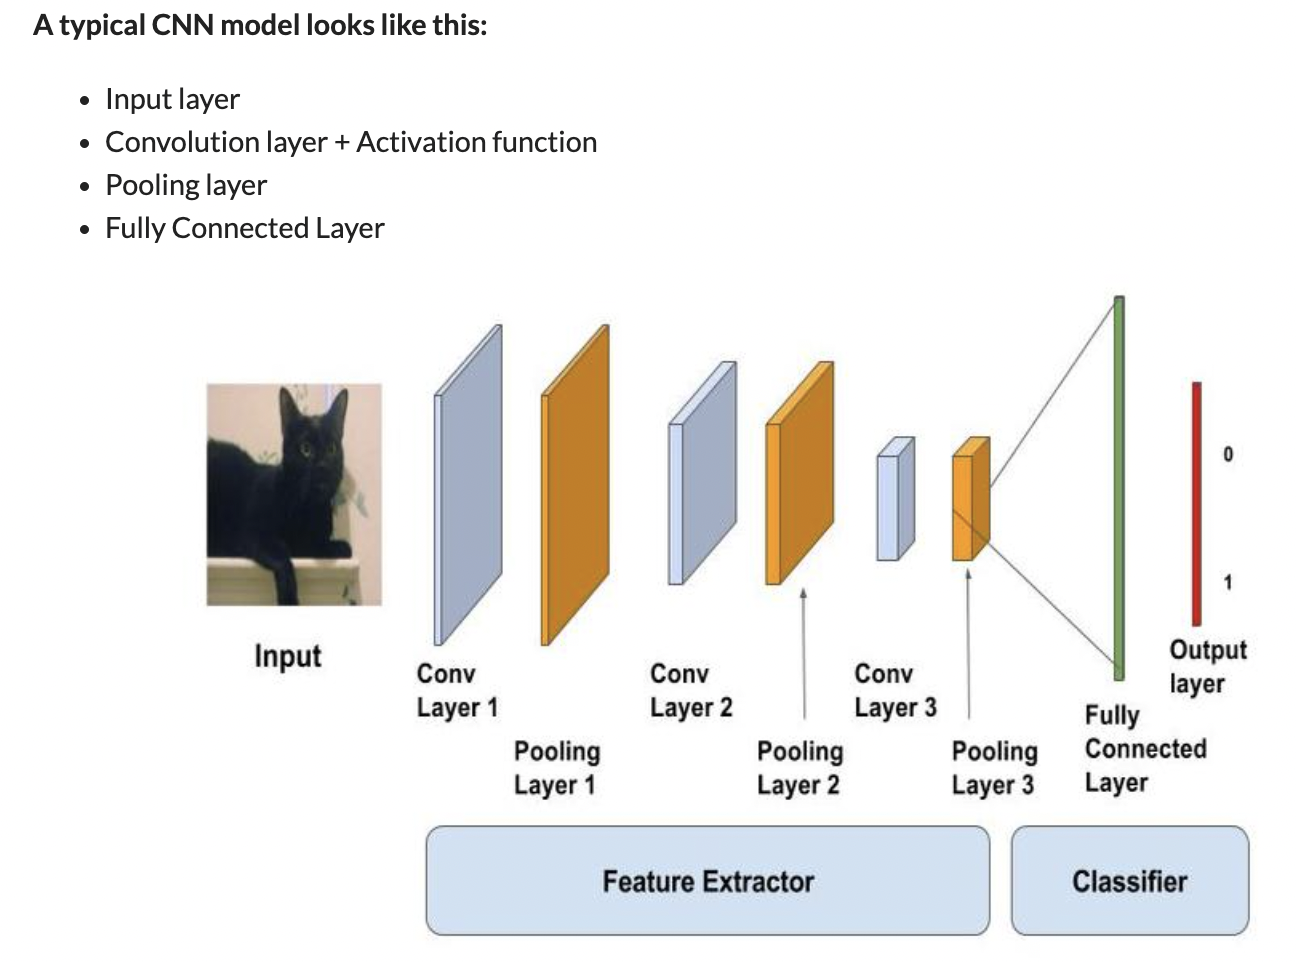

In [21]:
Image(filename='CNN.png', width=400)

**If you don't know what any of this means don't worry. Neural networks require vast amounts of data to train these models and because they are a black box, it is very uninterpretable especiailly the in the business environment. In conclusion, they are a powerful but it will be rare if you come across them directly unless you are pursuing a true Data Science career.**